In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('ex1data1.txt', sep = ',', header = None)

In [3]:
data1.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data1.columns = ['x', 'y']

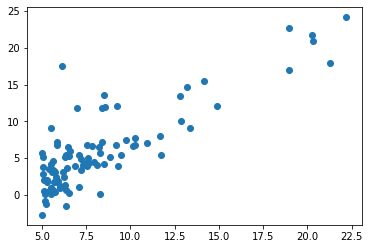

In [5]:
plt.scatter(data1['x'], data1['y'])

In [6]:
def predict(x, a, b):
    y = a*x + b
    return y

In [7]:
def root_sum_squared_error(y, y_pred):
    rsse = np.sqrt(np.sum((y - y_pred)**2))
    return rsse

In [8]:
def gradient_descent(x, y, a, b, learning_rate):
    y_pred = predict(x, a, b) 
    a = a - learning_rate * np.dot((y_pred - y),x)/len(x)
    b = b - learning_rate * np.sum(y_pred - y)/len(x)
    return a, b

In [9]:
x = data1.x.values
y = data1.y.values
a = 0
b = 0
learning_rate = 0.001
y_pred = predict(x, a, b)
rsse = root_sum_squared_error(y, y_pred)
print (rsse)

78.88035479272644


In [10]:
rsse_list = []
rsse_temp = 0
while True:
    y_pred = predict(x, a, b)
    rsse = root_sum_squared_error(y, y_pred)
    rsse_list.append(rsse)
    if np.abs((rsse-rsse_temp)) == 0:
        break
    rsse_temp = rsse
    a, b = gradient_descent(x, y, a, b, learning_rate)
print (a, b)

1.193032785932121 -3.8957723351082074


Text(0.5, 0, 'Epoch')

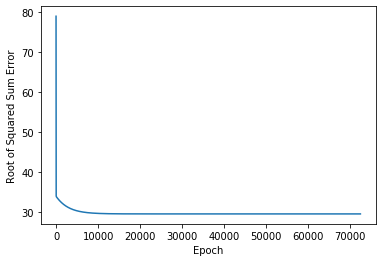

In [11]:
plt.plot(rsse_list)
plt.ylabel('Root of Squared Sum Error')
plt.xlabel('Epoch')

In [12]:
dot_x = np.linspace(0, max(data1.x), 100)

In [13]:
dot_y = predict(dot_x, a, b)

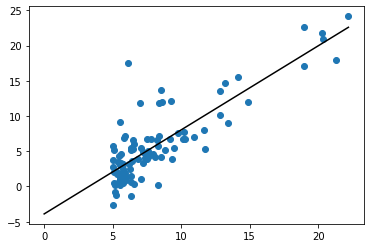

In [14]:
plt.scatter(data1['x'], data1['y'])
plt.plot(dot_x, dot_y, '-k')

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
coef = reg.coef_

In [17]:
intercept = reg.intercept_

In [18]:
dot_x1 = np.linspace(0, max(data1.x), 100)

In [19]:
dot_y1 = predict(dot_x1, coef, intercept)

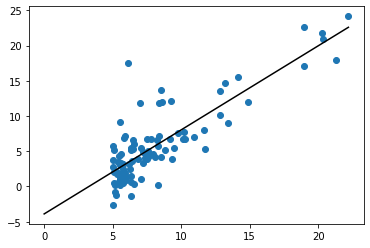

In [20]:
plt.scatter(data1['x'], data1['y'])
plt.plot(dot_x1, dot_y1, '-k')